In [81]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the data

df=pd.read_csv("Employeers_data.csv")


###Basic data info


In [82]:
print("Dataset Shape:",df.shape)
print(df.head(10))

print("\nDataset Info:\n")
df.info()

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nStatistical Summary:\n")
print(df.describe(include="all").T)

Dataset Shape: (10000, 17)
   id  age     Sex            Occupation    Field Working Hours Package  \
0   1   70  Female          Intermediate       CA          1 Hr   6 LPA   
1   2   41    Male  Working professional       CA          3 Hr  27 LPA   
2   3   33  Female          Intermediate  Finance          7 Hr  30 LPA   
3   4   50    Male           Experienced       CA          4 Hr  14 LPA   
4   5   47  Female  Working professional       CA          4 Hr  17 LPA   
5   6   27    Male  Working professional       CA          4 Hr  14 LPA   
6   7   20  Female  Working professional       IT          9 Hr  27 LPA   
7   8   66  Female  Working professional  Finance          5 Hr   7 LPA   
8   9   32    Male           Experienced       IT          3 Hr  29 LPA   
9  10   67    Male           Experienced       IT          2 Hr  20 LPA   

    Job Type                                       Company Type  \
0     Remote                                   Non-Profit / NGO   
1     Remote 

##Data cleaning and transformation


In [85]:
numeric_cols=["Salary Per Month", "Package", "Working Hours", "Overtime Pay"]
for col in numeric_cols:
  if col in df.columns:
    df[col]=(df[col]
            .astype(str)
            .str.replace(",","")
            .str.replace("₹","", regex=False) # Remove currency symbol
            .str.replace("LPA","", regex=False) # Remove 'LPA'
            .str.replace("/hour","", regex=False) # Remove '/hour'
            .str.extract(r"(\d+\.?\d*)")[0]
             .astype(float))

# Convert 'Bonus' to numeric by extracting the lower bound of the range
if 'Bonus' in df.columns:
    df['Bonus_Numeric'] = (df['Bonus']
                           .astype(str)
                           .str.replace('₹', '', regex=False)
                           .str.replace(',', '', regex=False)
                           .str.extract(r'(\d+)') # Extract the first number
                           .astype(float)
                          )

    # Convert 'OverTime Pay' to numeric
df['OverTime Pay Numeric'] = (df['OverTime Pay']
                              .astype(str)
                              .str.replace('₹', '', regex=False) # Remove currency symbol
                              .str.replace('/hour', '', regex=False) # Remove '/hour'
                              .str.extract(r'(\d+\.?\d*)')[0] # Extract numeric part
                              .astype(float))

# Create dummy variables for 'Allowances'
if 'Allowances' in df.columns:
    allowances_dummies = pd.get_dummies(df['Allowances'], prefix='Allowances', dummy_na=False)
    df = pd.concat([df, allowances_dummies], axis=1)


df.fillna({
    "Sex":"Unknown",
    "Education_level": "Not Specified",
    "Company Type": "Unknown",
    "Job Type": "Not Specified"
},inplace=True)


if "age" in df.columns:
  bins=[18,25,35,45,55,65]
  labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
  df["Age_Group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)

##Univariate Analysis

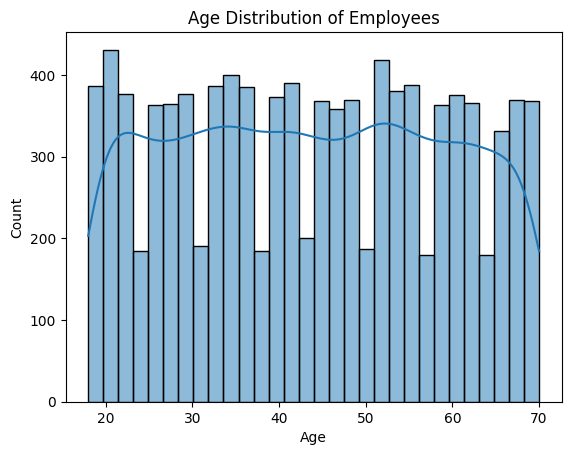

In [86]:
#The age distribution of employees

sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

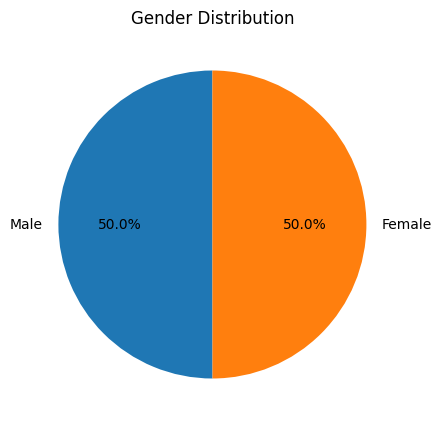

In [87]:
#The gender ratio in the dataset

plt.figure(figsize=(5,5))
df["Sex"].value_counts().plot.pie(autopct="%1.1f%%",startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

/tmp/ipython-input-1708276708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education_level', data=df, order=df['Education_level'].value_counts().index,palette="viridis")


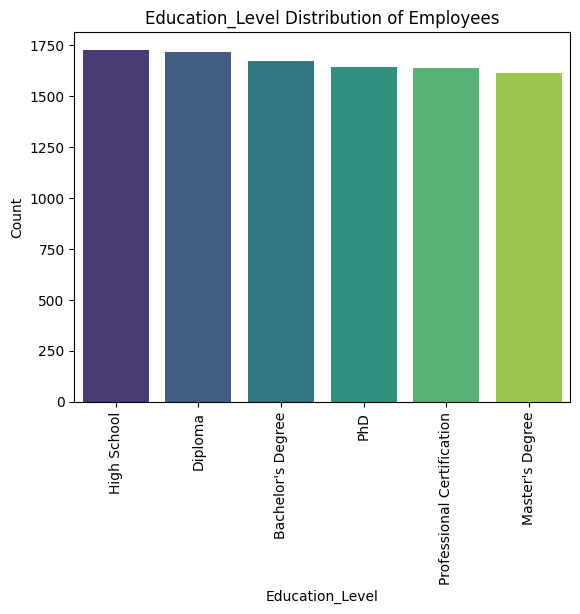

In [88]:
#The distribution of education levels

sns.countplot(x='Education_level', data=df, order=df['Education_level'].value_counts().index,palette="viridis")
plt.title("Education_Level Distribution of Employees")
plt.xlabel("Education_Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

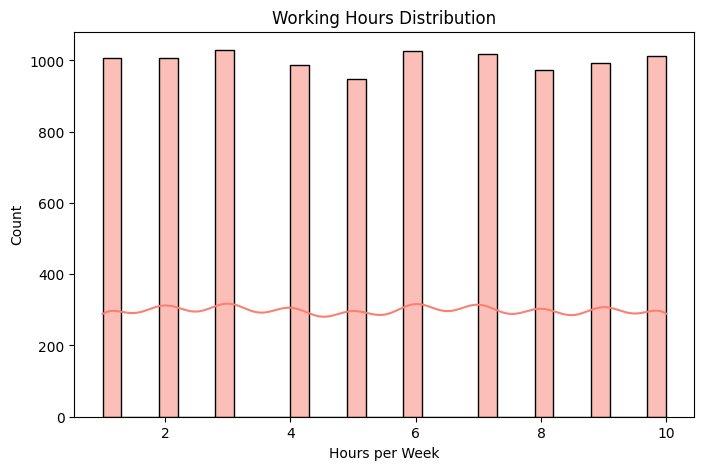

In [89]:
#working hours distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Working Hours'], kde=True, bins=30, color='salmon')
plt.title("Working Hours Distribution")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.show()



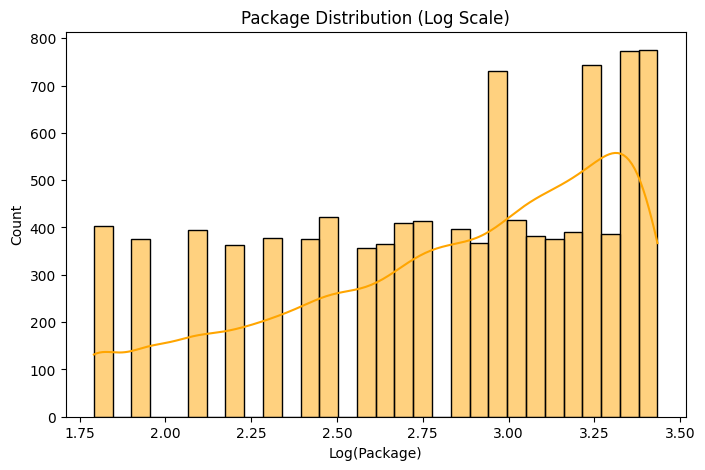

In [90]:
#the overall distribution of salary per month & package

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['Package']), kde=True, bins=30, color='orange')
plt.title("Package Distribution (Log Scale)")
plt.xlabel("Log(Package)")
plt.ylabel("Count")
plt.show()



##Bivariate Analysis

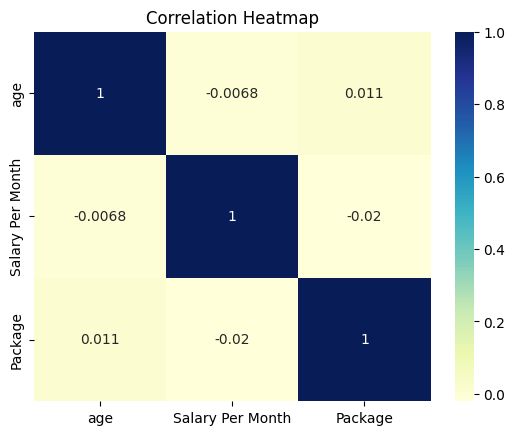

In [91]:
#Does age and working hours affect package/salary?


# Correlation heatmap
num_cols = ['age','Salary Per Month','Package']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-1262533440.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Salary Per Month', data=df, palette='Set2')


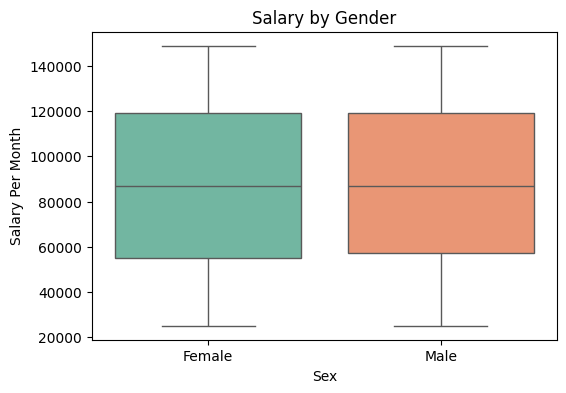

In [92]:
#Does gender affect salary/package?

plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='Salary Per Month', data=df, palette='Set2')
plt.title("Salary by Gender")
plt.show()



/tmp/ipython-input-2184749194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_level', y='Package', data=df, palette='Set3')


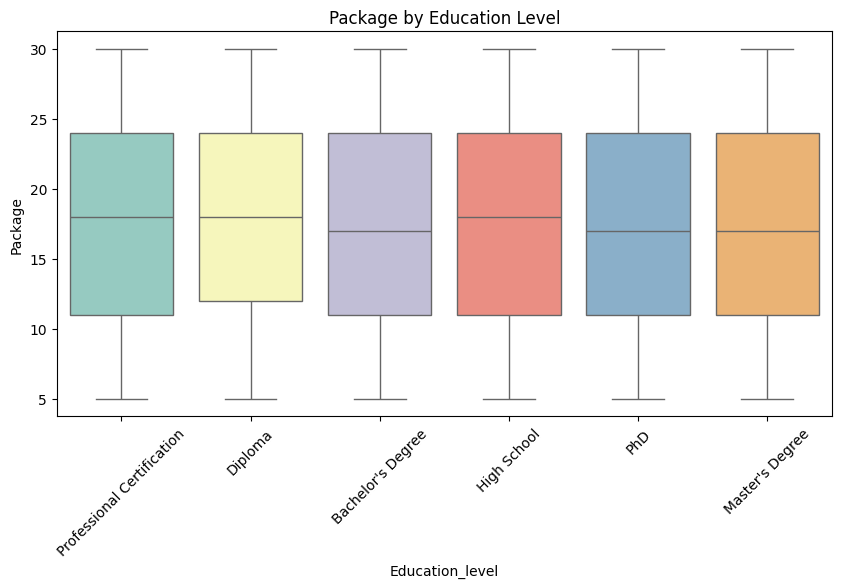

In [93]:
#Does education level influence salary/package?

plt.figure(figsize=(10,5))
sns.boxplot(x='Education_level', y='Package', data=df, palette='Set3')
plt.title("Package by Education Level")
plt.xticks(rotation=45)
plt.show()

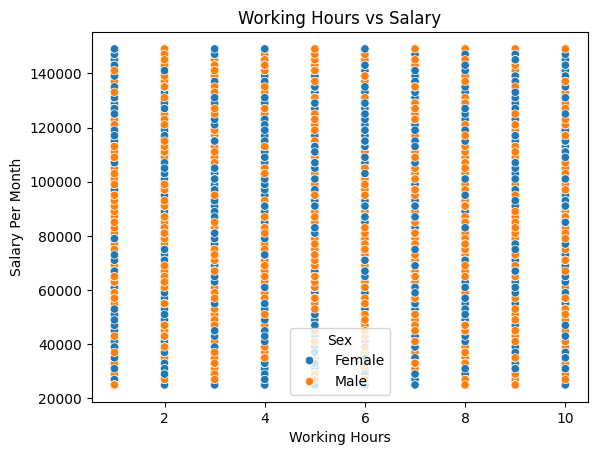

In [94]:
#Correlation of working hours with salary/package

sns.scatterplot(x='Working Hours', y='Salary Per Month', hue='Sex', data=df)
plt.title("Working Hours vs Salary")
plt.show()


/tmp/ipython-input-1807139443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Package', data=df, palette='Set2')


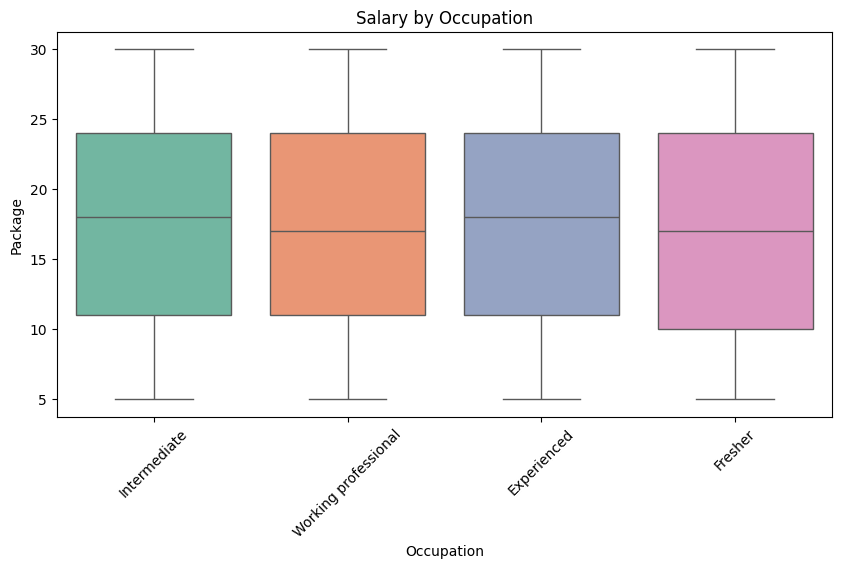

In [95]:
#How does occupation affect salary?

plt.figure(figsize=(10,5))
sns.boxplot(x='Occupation', y='Package', data=df, palette='Set2')
plt.title("Salary by Occupation")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-265456225.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Field', y='Package', hue='Sex', data=df, ci=None)


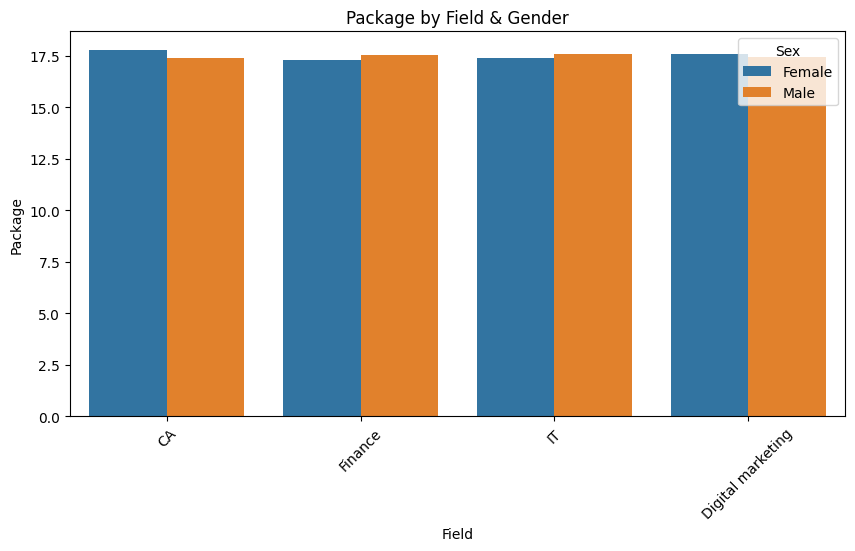

In [96]:
#Field vs Salary

plt.figure(figsize=(10,5))
sns.barplot(x='Field', y='Package', hue='Sex', data=df, ci=None)
plt.title("Package by Field & Gender")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-78968968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Package', y='Company Type', data=df, palette='Pastel1')


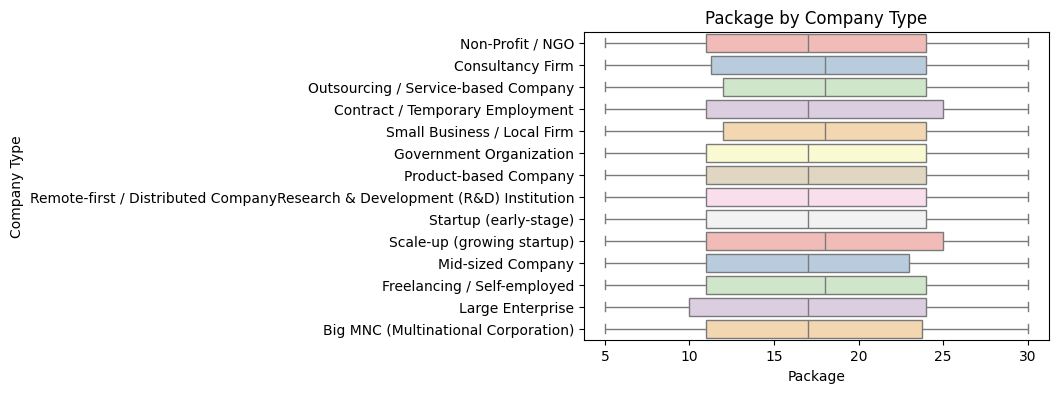

In [97]:
#Does company type (MNC vs Startup) affect package?

plt.figure(figsize=(6,4))
sns.boxplot(x='Package', y='Company Type', data=df, palette='Pastel1')
plt.title("Package by Company Type")
plt.show()


/tmp/ipython-input-43902542.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='Set3')


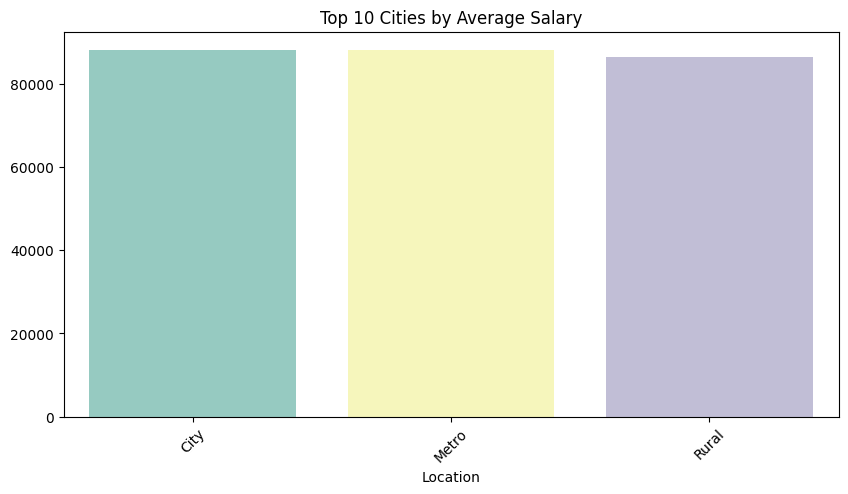

In [98]:
#How does location influence salary?

top_cities = df.groupby('Location')['Salary Per Month'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Set3')
plt.title("Top 10 Cities by Average Salary")
plt.xticks(rotation=45)
plt.show()


In [99]:
#How Marital Status affects Working Hours?

marital_gender=df.groupby(["Sex","Marital Status","Working Hours"]).size().unstack(fill_value=0)
marital_gender


Working Hours          1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
Sex    Marital Status                                                         
Female Divorced         168   153   165   149   149   171   166   165   169   
       Married          184   173   173   159   156   156   178   161   161   
       Single           176   171   178   185   182   156   156   161   161   
Male   Divorced         151   169   171   137   171   189   187   163   165   
       Married          159   142   169   187   142   186   174   146   176   
       Single           170   198   173   170   148   169   156   177   160   

Working Hours          10.0  
Sex    Marital Status        
Female Divorced         167  
       Married          174  
       Single           176  
Male   Divorced         181  
       Married          160  
       Single           155

##Multivariate Analysis


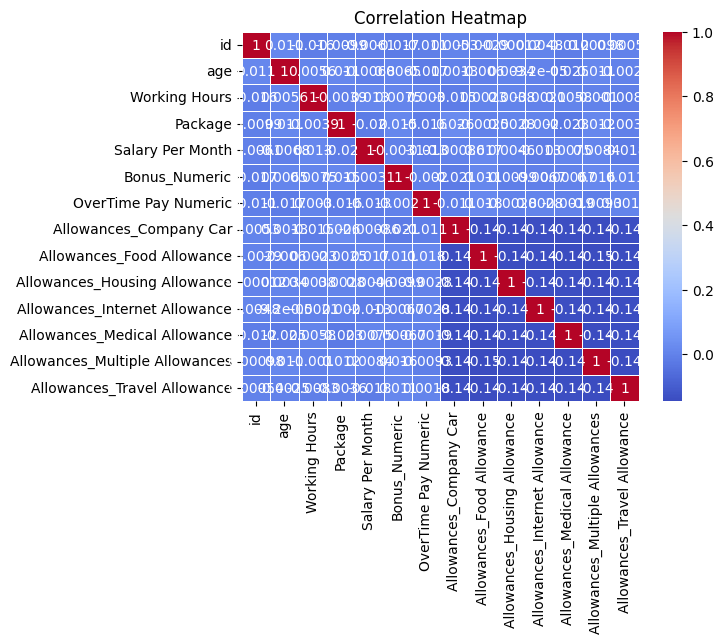

In [100]:
#Does age and working hours affect package/salary?


corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

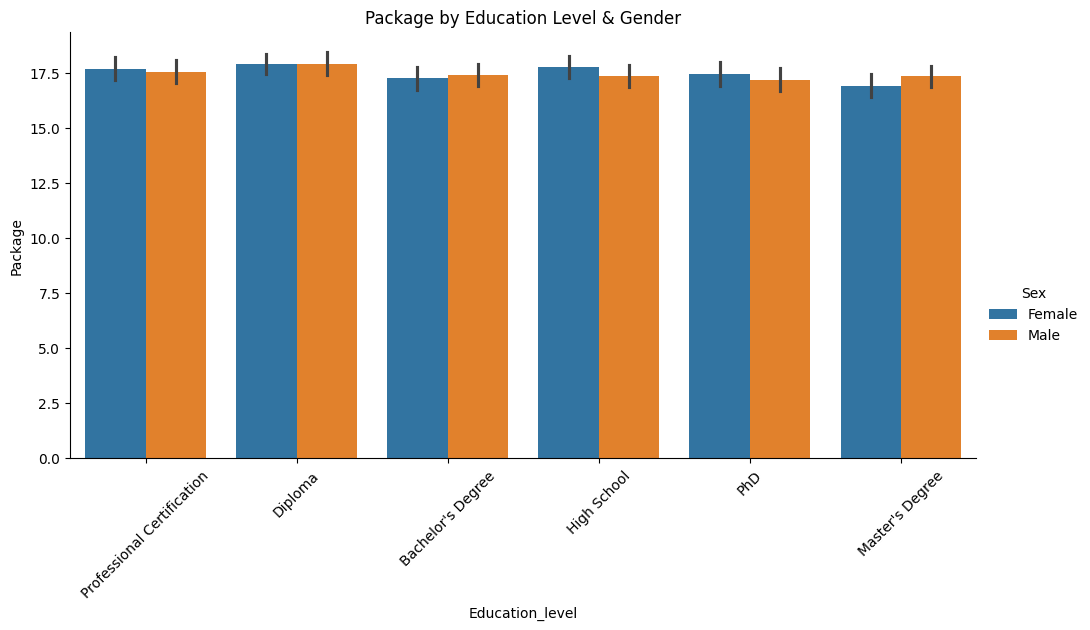

In [101]:
#Does education and gender together impact salary?

sns.catplot(x='Education_level', y='Package', hue='Sex', kind='bar', data=df, height=5, aspect=2)
plt.title("Package by Education Level & Gender")
plt.xticks(rotation=45)
plt.show()

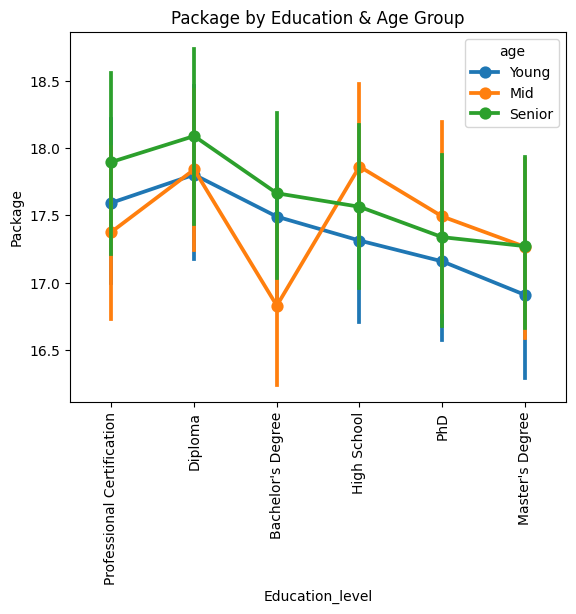

In [102]:
#How does experience and education level together influence package?

sns.pointplot(x='Education_level', y='Package', hue=pd.qcut(df['age'], 3, labels=['Young','Mid','Senior']), data=df)
plt.title("Package by Education & Age Group")
plt.xticks(rotation=90)
plt.show()

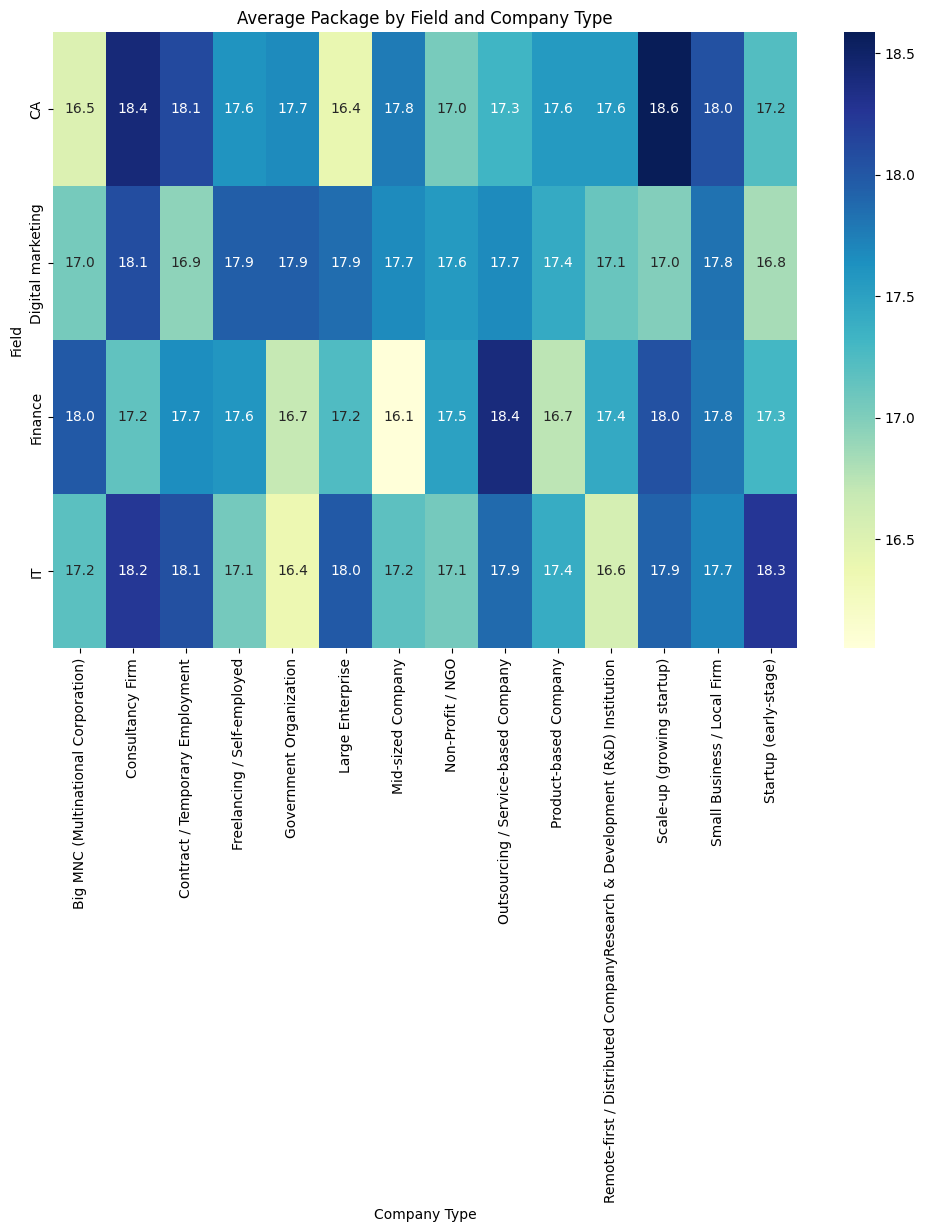

In [103]:
#Does field + occupation + company type together affect salary?

pivot_table = pd.pivot_table(df, values='Package', index=['Field'], columns=['Company Type'], aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Package by Field and Company Type')
plt.show()

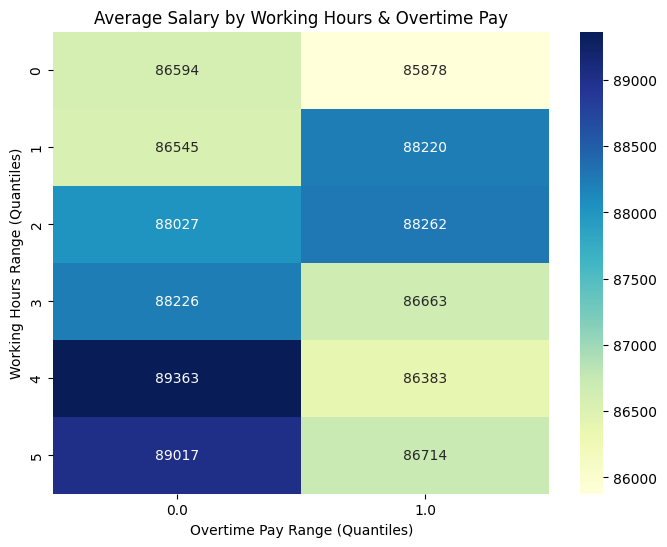

In [107]:
#How do working hours + overtime pay together affect salary?

# Create pivot table for average salary using numeric overtime pay
pivot = df.pivot_table(values='Salary Per Month',
                       index=pd.qcut(df['Working Hours'], 6, labels=False, duplicates='drop'), # Use labels=False for numeric bins
                       columns=pd.qcut(df['OverTime Pay Numeric'], 6, labels=False, duplicates='drop'), # Use numeric overtime pay and labels=False
                       aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Salary by Working Hours & Overtime Pay')
plt.xlabel('Overtime Pay Range (Quantiles)')
plt.ylabel('Working Hours Range (Quantiles)')
plt.show()

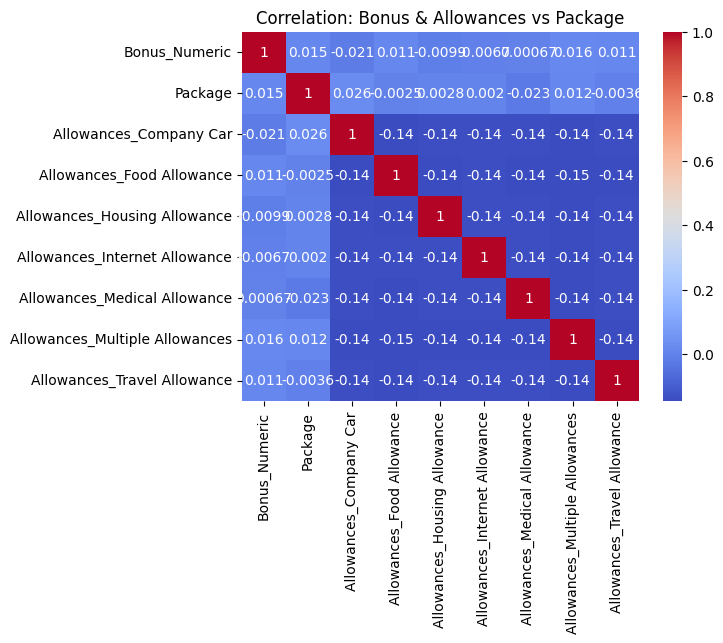

In [108]:
num_cols2 = ['Bonus_Numeric', 'Package'] + [col for col in df.columns if col.startswith('Allowances_')]
corr2 = df[num_cols2].corr()
sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.title("Correlation: Bonus & Allowances vs Package")
plt.show()